### <img src='https://github.com/mrlondz/Zyelabs---Coding-Challenge---Londanani-Khomola/blob/main/zyelabs_coding_challenge.PNG?raw=true' width="600" height="1000" align="middle" >

## <font color=green> Libraries</font>

In [3]:
import pandas as pd
import numpy as np
import re
import warnings
import matplotlib.pyplot as plt # Plotting Data
import seaborn as sns
sns.set(style="ticks", color_codes=True)

warnings.filterwarnings('ignore')

## <font color=green> Understanding the Data</font>

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/mrlondz/Zyelabs---Coding-Challenge---Londanani-Khomola/main/2016_Matric_Schools_Report.csv', delimiter='str', names = ['col1'])

df = df.col1.str.split(expand=True, pat = ","); df.columns = df.iloc[0] # Data Read as one colummn, then separated by ','

df.drop([0], inplace = True) ; df = df[df.columns[:-1]] # First row to be column names
df.head(5)

,emis,centre_no,name,wrote_2014,passed_2014,wrote_2015,passed_2015,wrote_2016,passed_2016
1,0,4021043,MBUMBAZI SENIOR SECONDARY SCHOOL,,,,,38,11
2,700888031,8888031,VINE CHRISTIAN COLLEGE,,,,,3,0
3,0,5512000,UGU CENTRE 1,,,,,32,29
4,600105347,9158037,NEW COVENANT ACADEMY,,,20,5,13,3
5,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,37,14,38,29,51,36


In [5]:
# Rows that needed cleaning (Analysed prior)

df.drop([6051], inplace = True)
df.drop([6121], inplace = True)

df.append(['103007278','1001101','ABBOTTS COLLEGE MILNERTON','87','87','92','92','80','78'])
df.append(['105483613', '1009947', 'CAPE ACADEMY FOR MATHS SCIENCE AND TEC', '106', '100', '133', '132', '112'])

numeric_cols = [x for x in df.columns if x != 'name'] 
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric) # Allocate proper data type for column

df.reset_index(drop = True, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6222 entries, 0 to 6221
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   emis         6221 non-null   float64
 1   centre_no    6222 non-null   int64  
 2   name         6222 non-null   object 
 3   wrote_2014   5991 non-null   float64
 4   passed_2014  5991 non-null   float64
 5   wrote_2015   6107 non-null   float64
 6   passed_2015  6107 non-null   float64
 7   wrote_2016   6222 non-null   int64  
 8   passed_2016  6222 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 437.6+ KB


In [6]:
df.fillna(0, inplace=True) # Replace missing values with zeroes
df.head(5)

,emis,centre_no,name,wrote_2014,passed_2014,wrote_2015,passed_2015,wrote_2016,passed_2016
0,0.0,4021043,MBUMBAZI SENIOR SECONDARY SCHOOL,0.0,0.0,0.0,0.0,38,11
1,700888031.0,8888031,VINE CHRISTIAN COLLEGE,0.0,0.0,0.0,0.0,3,0
2,0.0,5512000,UGU CENTRE 1,0.0,0.0,0.0,0.0,32,29
3,600105347.0,9158037,NEW COVENANT ACADEMY,0.0,0.0,20.0,5.0,13,3
4,200300003.0,4161001,AMABELE SENIOR SECONDARY SCHOOL,37.0,14.0,38.0,29.0,51,36


## <font color=green> Calculations and Extracting Insights</font>

In [7]:
def passed_pct_calculation(wrote, passed):
    
    """Calculates percentage of people that passed exam"""
    
    passed_pct = []
    for x, y in zip(wrote, passed):
        if x == 0.0:
            passed_pct.append(x)
        else:
            passed_pct.append(round(y/x*100,1))

    return passed_pct

In [8]:
"""ADD COLUMNS FOR % PASSED"""

df['passed_pct_2014'] = passed_pct_calculation(df.wrote_2014, df.passed_2014)
df['passed_pct_2015'] = passed_pct_calculation(df.wrote_2015, df.passed_2015)
df['passed_pct_2016'] = passed_pct_calculation(df.wrote_2016, df.passed_2016)
df.head(3)

,emis,centre_no,name,wrote_2014,passed_2014,wrote_2015,passed_2015,wrote_2016,passed_2016,passed_pct_2014,passed_pct_2015,passed_pct_2016
0,0.0,4021043,MBUMBAZI SENIOR SECONDARY SCHOOL,0.0,0.0,0.0,0.0,38,11,0.0,0.0,28.9
1,700888031.0,8888031,VINE CHRISTIAN COLLEGE,0.0,0.0,0.0,0.0,3,0,0.0,0.0,0.0
2,0.0,5512000,UGU CENTRE 1,0.0,0.0,0.0,0.0,32,29,0.0,0.0,90.6


### <font color=green> PASS % Analysis</font>

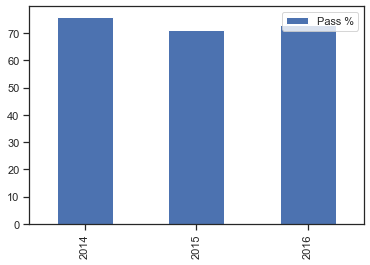

In [9]:
"""AVERAGE PASS % PER YEAR"""

pass_pct_14 = round(sum(df.passed_2014)/sum(df.wrote_2014)*100)
pass_pct_15 = round(sum(df.passed_2015)/sum(df.wrote_2015)*100)
pass_pct_16 = round(sum(df.passed_2016)/sum(df.wrote_2016)*100)

pd.DataFrame([pass_pct_14, pass_pct_15, pass_pct_16], index = ['2014', '2015', '2016'], columns = ['Pass %']).plot(kind = 'bar')

#### Pass % Distribution

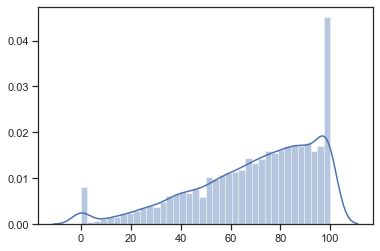

In [39]:
sns.distplot(df[['passed_pct_2014', 'passed_pct_2015', 'passed_pct_2016']])

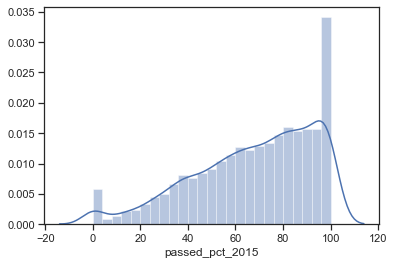

In [42]:
sns.distplot(df.passed_pct_2015)

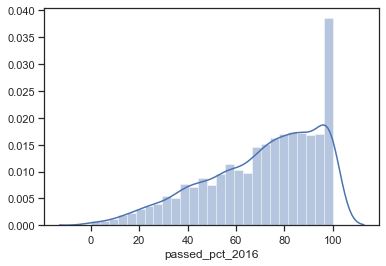

In [43]:
sns.distplot(df.passed_pct_2016)

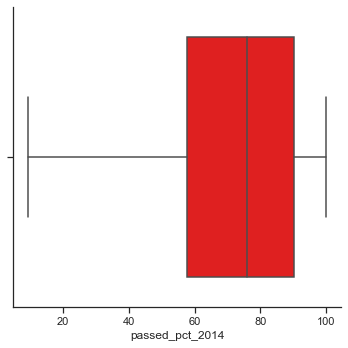

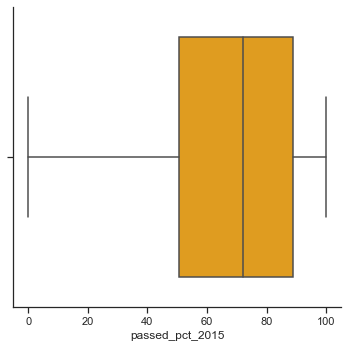

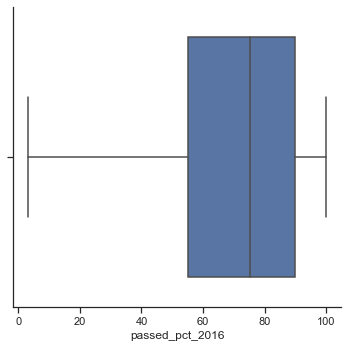

In [44]:
sns.catplot("passed_pct_2014", kind="box", data=df, showfliers=False, color='red')
sns.catplot("passed_pct_2015", kind="box", data=df, showfliers=False, color='orange')
sns.catplot("passed_pct_2016", kind="box", data=df, showfliers=False)

## <font color=green> Build a Model of the data to store in a database</font>

In [276]:
# INSTALL all of the dependencies to make django can be run under jupyter notebook via

pip install jupyter ipython django-extensions

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: widgetsnbextension~=3.5.0 in c:\programdata\anaconda3\lib\site-packages (from ipywidgets->jupyter) (3.5.1)



In [280]:
pip install django

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install django-extensions

In [15]:
from django.db import models

In [12]:
df.head(3)

,emis,centre_no,name,wrote_2014,passed_2014,wrote_2015,passed_2015,wrote_2016,passed_2016,passed_pct_2014,passed_pct_2015,passed_pct_2016
0,0.0,4021043,MBUMBAZI SENIOR SECONDARY SCHOOL,0.0,0.0,0.0,0.0,38,11,0.0,0.0,28.9
1,700888031.0,8888031,VINE CHRISTIAN COLLEGE,0.0,0.0,0.0,0.0,3,0,0.0,0.0,0.0
2,0.0,5512000,UGU CENTRE 1,0.0,0.0,0.0,0.0,32,29,0.0,0.0,90.6


In [20]:
class Matric_Schools_Report(models.Model):
    emis = models.DecimalField()
    centre_no = models.DecimalField()
    name = models.CharField(max_length=50)
    wrote_2014 = models.DecimalField()
    passed_2014 = models.DecimalField()
    wrote_2015 = models.DecimalField()
    passed_2015 = models.DecimalField()
    passed_2016 = models.DecimalField()
    passed_pct_2014 = models.DecimalField()
    passed_pct_2015 = models.DecimalField()
    passed_pct_2016 = models.DecimalField()

ModuleNotFoundError: No module named 'mysite'

In [49]:
from django_for_jupyter import init_django
init_django("cfehome")

ModuleNotFoundError: No module named 'django_for_jupyter'